Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Importing the Paris Housing Price Dataset

In [2]:
house_price_dataset = pd.read_csv('/content/ParisHousing.csv')

In [3]:
print(house_price_dataset)

      squareMeters  numberOfRooms  hasYard  hasPool  floors  cityCode  \
0            75523              3        0        1      63      9373   
1            80771             39        1        1      98     39381   
2            55712             58        0        1      19     34457   
3            32316             47        0        0       6     27939   
4            70429             19        1        1      90     38045   
...            ...            ...      ...      ...     ...       ...   
9995          1726             89        0        1       5     73133   
9996         44403             29        1        1      12     34606   
9997         83841              3        0        0      69     80933   
9998         59036             70        0        0      96     55856   
9999          1440             84        0        0      49     18412   

      cityPartRange  numPrevOwners  made  isNewBuilt  hasStormProtector  \
0                 3              8  2005        

In [4]:
house_price_dataset.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [5]:
# checking the number of rows & columns
house_price_dataset.shape

(10000, 17)

In [6]:
# checking the missing values
house_price_dataset.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

In [7]:
# stats about data
house_price_dataset.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


Understanding the correlation between the features in the dataset


1.   Positive Correlation
2.   Nrgative Correlation



In [8]:
correlation = house_price_dataset.corr()

In [9]:
house_price_dataset.corr()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
squareMeters,1.000000,0.009573,-0.006650,-0.005594,0.001109,-0.001541,0.008758,0.016619,-0.007207,-0.010667,0.007480,-0.003960,-0.000588,-0.017246,-0.003486,-0.000623,0.999999
numberOfRooms,0.009573,1.000000,-0.011240,0.017015,0.022244,0.009040,0.008340,0.016766,0.003978,-0.002865,-0.001656,-0.013990,0.012061,0.023188,-0.004760,-0.015529,0.009591
hasYard,-0.006650,-0.011240,1.000000,0.015514,-0.000883,0.006760,0.005023,0.004279,0.002214,-0.008370,-0.007598,-0.008558,-0.003085,-0.004626,-0.009506,-0.007276,-0.006119
hasPool,-0.005594,0.017015,0.015514,1.000000,-0.004006,0.008072,0.014613,-0.006848,0.001894,0.000188,-0.001001,-0.007268,-0.011901,0.004832,0.001238,0.001123,-0.005070
floors,0.001109,0.022244,-0.000883,-0.004006,1.000000,0.002207,-0.004921,0.002463,0.005022,0.002458,-0.008566,0.006228,-0.000270,0.011303,0.003616,-0.021155,0.001654
cityCode,-0.001541,0.009040,0.006760,0.008072,0.002207,1.000000,0.011334,-0.007549,0.009266,-0.000224,-0.004941,0.002652,-0.002019,-0.002208,0.002554,-0.003338,-0.001539
cityPartRange,0.008758,0.008340,0.005023,0.014613,-0.004921,0.011334,1.000000,0.009238,0.007748,-0.001874,0.005224,0.004743,0.010696,-0.001648,-0.011338,-0.007153,0.008813
numPrevOwners,0.016619,0.016766,0.004279,-0.006848,0.002463,-0.007549,0.009238,1.000000,0.006858,-0.017420,0.002522,-0.000862,0.000719,0.020268,0.031707,-0.006082,0.016619
made,-0.007207,0.003978,0.002214,0.001894,0.005022,0.009266,0.007748,0.006858,1.000000,-0.001678,-0.000645,-0.005506,0.013773,0.005687,-0.007868,-0.005431,-0.007210
isNewBuilt,-0.010667,-0.002865,-0.008370,0.000188,0.002458,-0.000224,-0.001874,-0.017420,-0.001678,1.000000,0.003200,-0.015986,0.020127,0.002749,0.007011,0.019895,-0.010643


In [10]:
correlation.min()

squareMeters        -0.017246
numberOfRooms       -0.015529
hasYard             -0.011240
hasPool             -0.011901
floors              -0.021155
cityCode            -0.007549
cityPartRange       -0.011338
numPrevOwners       -0.017420
made                -0.007868
isNewBuilt          -0.017420
hasStormProtector   -0.008566
basement            -0.020732
attic               -0.011995
garage              -0.017316
hasStorageRoom      -0.011338
hasGuestRoom        -0.021155
price               -0.017229
dtype: float64

<Axes: >

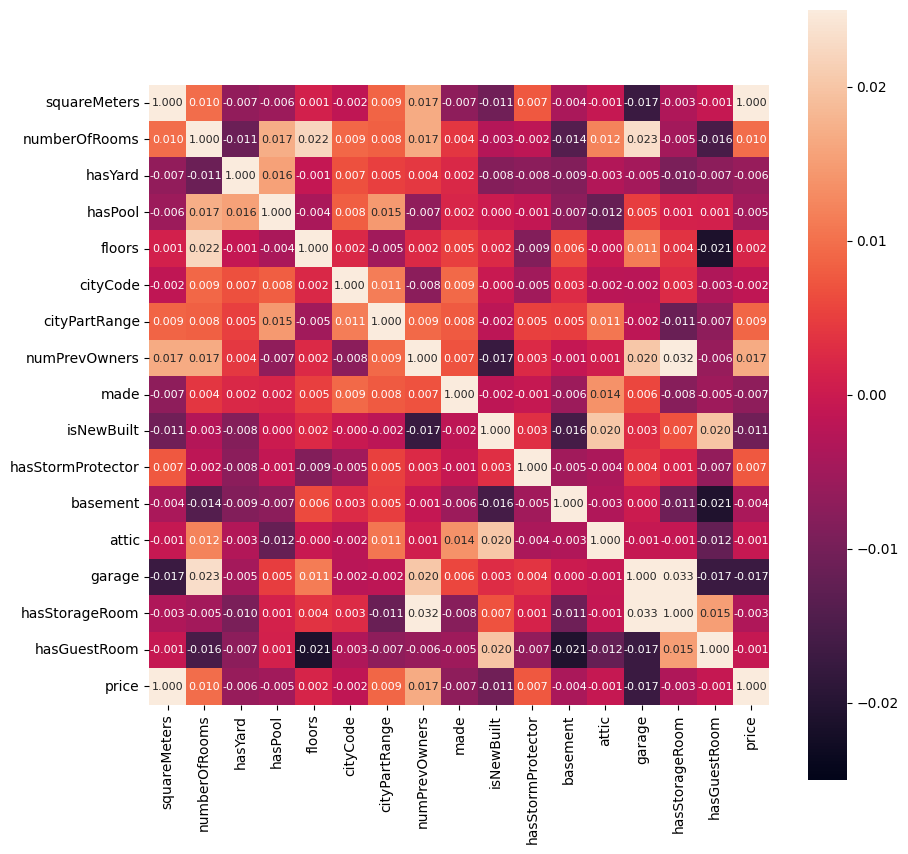

In [11]:
# constructing a heat map to understand correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation,vmin=-0.025 , vmax=0.025,cbar=True,square=True,annot=True,fmt='.3f', annot_kws={'size':8})

<Axes: >

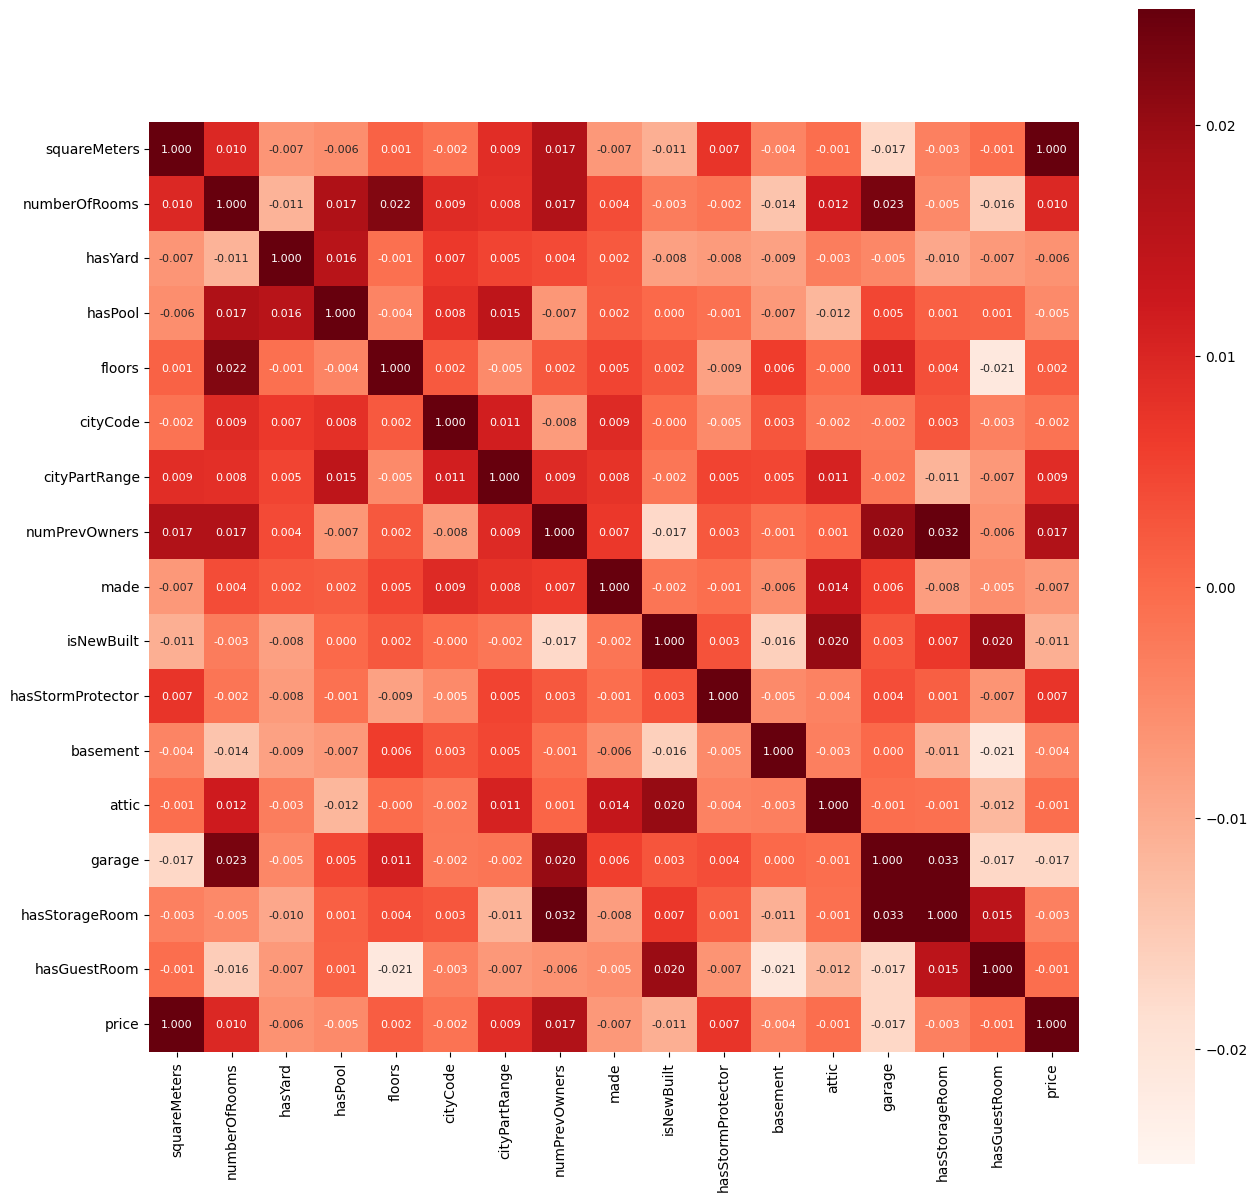

In [12]:
# constructing a heat map to understand correlation
plt.figure(figsize=(15,15))
sns.heatmap(correlation,vmin=-0.025 , vmax=0.025,cbar=True,square=True,annot=True,fmt='.3f', annot_kws={'size':8},cmap='Reds')

Splitting the data & target

In [13]:
X = house_price_dataset.drop(['price'],axis=1)
Y = house_price_dataset['price']

In [14]:
print(X)
print(Y)

      squareMeters  numberOfRooms  hasYard  hasPool  floors  cityCode  \
0            75523              3        0        1      63      9373   
1            80771             39        1        1      98     39381   
2            55712             58        0        1      19     34457   
3            32316             47        0        0       6     27939   
4            70429             19        1        1      90     38045   
...            ...            ...      ...      ...     ...       ...   
9995          1726             89        0        1       5     73133   
9996         44403             29        1        1      12     34606   
9997         83841              3        0        0      69     80933   
9998         59036             70        0        0      96     55856   
9999          1440             84        0        0      49     18412   

      cityPartRange  numPrevOwners  made  isNewBuilt  hasStormProtector  \
0                 3              8  2005        

Splitting the data into training data and test data

In [15]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2, random_state=2)

In [16]:
print(X.shape,X_train.shape,X_test.shape)

(10000, 16) (8000, 16) (2000, 16)


Model Training

XGBoost Regressor

In [17]:
# importing the model
model = XGBRegressor()

In [18]:
# training the model with X_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation

Prediction on training data

In [19]:
# accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [20]:
print(training_data_prediction)

[ 588060.56  559936.   6551070.5  ... 3985430.   4508289.   1095224.1 ]


In [21]:
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print('R squared error: ' , score_1)
print('Mean Absolute error: ', score_2)

R squared error:  0.9999934948751406
Mean Absolute error:  5716.180727441406


Visualizing the actual Prices & predicted prices

In [22]:
Y_train.max()

10006771.2

In [23]:
Y_train.min()

14431.3

In [24]:
training_data_prediction.max()

10002408.0

In [25]:
training_data_prediction.min()

19192.357

In [26]:
plt.figure(figsize=(100,100))
plt.scatter(Y_train,training_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Price vs Predicted Price')
plt.yticks(np.arange(15000, 10010000, 1000000))
plt.xticks(np.arange(15000, 10010000, 1000000))
plt.show()

Prediction on test data

In [27]:
# accuracy for prediction on test data
test_data_prediction = model.predict(X_test)

In [28]:
# R squared error
score_1_1 = metrics.r2_score(Y_test, test_data_prediction)

# mean Absolute Error
score_2_1 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print('R squared error: ' , score_1_1)
print('Mean Absolute error: ', score_2_1)

R squared error:  0.9999760717032846
Mean Absolute error:  11693.280604687505


Making a Predictive System

In [29]:
input_data=(47664,44,0,0,77,98008,6,3,2010,1,1,2662,5433,417,0,6)

#changing the input data to numpy
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting on 1 instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)

print('The Predcited price of this house : ', prediction[0],'Euros')

The Predcited price of this house :  4762162.5 Euros


In [31]:
import pickle
filename = "house_price_prediction_model.sav"
pickle.dump(model , open(filename,'wb'))
#loading. the saved model
loaded_model = pickle.load(open('house_price_prediction_model.sav','rb'))

In [32]:
input_data=(47664,44,0,0,77,98008,6,3,2010,1,1,2662,5433,417,0,6)

#changing the input data to numpy
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting on 1 instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)

print('The Predcited price of this house : ', prediction[0],'Euros')

The Predcited price of this house :  4762162.5 Euros


In [34]:
#columns in dataframe
house_price_dataset.columns


Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price'],
      dtype='object')

In [36]:
house_price_dataset.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0
